# <center>Textual Analysis of SEC Filings</center>
### <center>(STAD95 Project Report)</center>

## Summary
Leave for last
    
## Introduction
Description of problem and background, only words
- Primary focus (what is to be addressed by the project)
- A list of prerequisites and key reasons for launch
- A very common description of how to perform the project
- A plain explanation of the desired outcome

## Methodology

### Data
We used the business description of 10K Annual Report Filings from SEC, with support from Ubineer for extracting the necesary data. Additonally, we joined our dataset with *__INSERT SIC CATGEORY RESOURCE HERE__* to obtain information regarding the SIC category of the company to better evaluate our results of company similarity and differences. 

We used the 2018 filings of companies from the top 5 categories (Prepackaged Software, Pharmaceutical Preparations, Crude Petroleum and Natural Gas, Real Estate Investment Trusts, State Commercial Banks) to train our word embedding models.

*__INSERT DATA USED FOR RETURNS/PORTFOLIO EVALUATION__*

### Methods
The research design of this study was experimental and exploratory. We started by investigating a variety of word embedding and topic modelling techniques to model the description similarity between companies. These modelling techniques include TF-IDF, Word2Vec, Universal Sentence Encoder, Latent Dirichilet Allocation, Non-Negative Matrix Factorization, and many others that we will discuss in detail in this report. Prior to fitting each model, we applied consistent data preprocessing methods such as word normalization by lemmatizing, stop word removal, and special character removal. We also applied dimensionality reduction using PCA and truncated SVD (specifically for LSA) to visualize the 2D and 3D plots of word embeddings.

We then evaluated the performance of our embedding models by comparing the cosine distance between text embeddings and returns correlations and used these correlations to build portfolios. __ADD MORE DETAILS ABOUT CREATING THE PORTFOLIOS?__

#### Data Preprocessing
The data was provided to us by Ubineer, which has been pulled and preprocessed for us. We further cleaned up the __Description__ text by removing HTML code, the first couple words which were common among all filings, and filtering for filings with over 250 characters.

We then removed stop words from the business descriptions, which includes common English words such as "the", "they", "and", "is", "are", "a", etc. These words don't provide meaning and therefore do not contribute to our goal of extracting meaning.

We also lemmatized all possible words (aka Text/Word Normalization) which remove inflectional endings only and to return the base or dictionary form of a word. For example, instances of "am", "are", "is" are converted to "be" and "playing", "played", "plays" are all converted to "play". This reduces the amount of different words we have to process, and also condenses the amount of information we receive.
 
#### Vectorizing Text Data
In this section, we created word embeddings of each document (ie. each description for a single year of filing for a company) and used PCA to visualize it in a 3D plot. Additionally, we evaluated the performance of each model by finding the 1-Nearest-Neighbour of each document embedding and compare the similarity of the SIC category of the company that these documents belong to.

##### Cosine Similarity Distance on word counts
Cosine similarity measures the similarity between two vectors of an inner product space. In text analysis, a document can be represented by its elements (words) and the frequency of each element. Comparing the frequency of words in different documents, which is the company description for companies in our case, would generate cosine similarity distance between documents. Each description generates a vector containing the frequency of each word. It measures the similarity between these companies in terms of their business description.





##### TF-IDF
Tf-Idf stands for term frequency - inverse document frequency. Each row in this matrix represents one document (in this case, one company) and each column represents a word (or n-gram, a sequence of words like “University of Toronto”). A term frequency matrix has the count of occurences of a given word for each document, while a tf-idf matrix performs a transformation on that term frequency matrix.



##### Word2Vec
Word2Vec is a shallow neural network that learns word vectors that represent how related each word is to every other word in the corpus. It can be implemented in two different ways; continuous bag of words (CBOW) or skip-gram negative sampling (SGNS). CBOW works by taking the surrounding words of a context word as input, along with sampled words further from the context word to learn word vectors in order to output a prediction score for the context word. SGNS works by taking a context word as an input and learning word vectors of its surrounding words and outputting probabilities of which words are most likely to be surrounding it. After training on a corpus of text, we take the trained word vectors and map them to documents, creating a word embedding for each document based on the average of all the word vectors of words in that document. 













##### Doc2Vec
Doc2Vec is a modification to the word2vec neural network. It adds one additional input to the neural network in the form of a paragraph id (document id in our case) which identifies which document the current words are from. This results in a model of document vectors which we can use directly to create word embeddings and evaluate it’s performance.

##### Universal Sentence Encoder 
The Universal Sentence Encoder encodes text into high-dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks. It is a pre-trained model created by Google that uses sources like Wikipedia, web news, web question-answer pages, and discussion forums. There are two variations of the model, one trained with Transformer encoder and the other with Deep Averaging Network (DAN). The one with Transformer encoder is computationally more intensive but provides better results, while DAN trades accuracy for lower computational requirements. In our works, the model with DAN has provided results with high accuracy so we do not require the Transformer encoder alternative. The input is a variable-length English text and the output is a normalised 512-dimensional vector. 

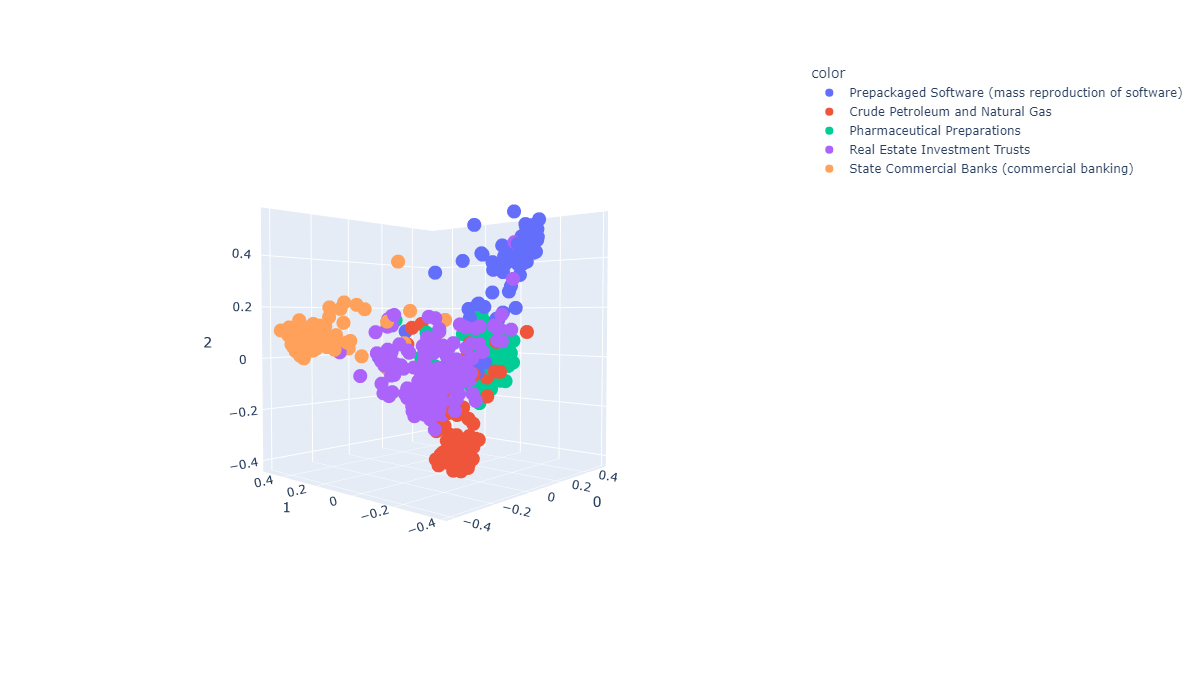

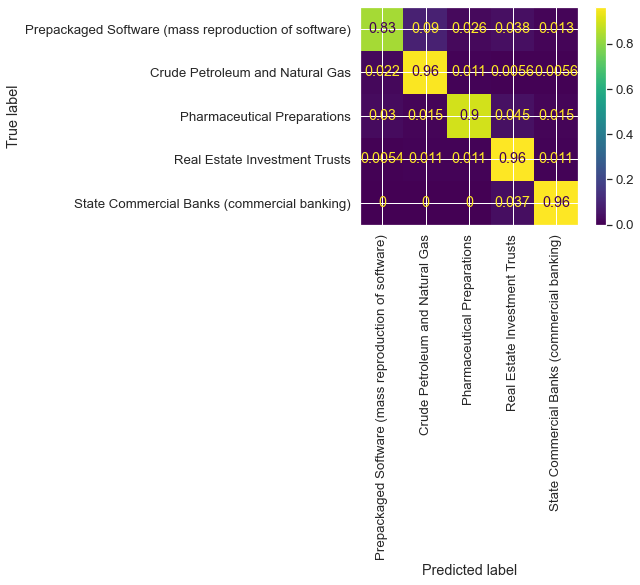

##### Two Towers
The two-tower model learns to represent two items of various types (such as user profiles, search queries, web documents, answer passages, or images) in the same vector space, so that similar or related items are close to each other. These two items are referred to as the query and candidate object, since when paired with a nearest neighbour search service such as Vertex Matching Engine, the two-tower model can retrieve candidate objects related to an input query object. These objects are encoded by a query and candidate encoder (the two "towers") respectively, which are trained on pairs of relevant items.

Since we wish to retrieve financial entities related to each other, we have the query item as the business description in plain text and the candidate item as the CIK ticker and its SIC category description of the financial entity. 

Training Data
We used the 2018 filings of companies descriptions from the top 5 categories (Prepackaged Software, Pharmaceutical Preparations, Crude Petroleum and Natural Gas, Real Estate Investment Trusts, State Commercial Banks) to train our model. Filings from multiple years for each company is used so that the model has a better understanding of each company and its relevant descriptions. 

Structure of a single record in the training data: 
{
        "query":
        {
            "description": x["coDescription"]
        },
        "candidate":
        {
            "financial_entity": x["CIK"],
            "category" : x["SIC_desc"]
        }
}
Results
PCA Plots
Cosine distance on word counts and TF-IDF


#### Topic Modelling

##### Non-Negative Matrix Factorization
Non-negative matrix factorization uses linear algebra to discover underlying relationships between texts. It factorizes/decomposes high-dimensionality vectors(tf-idf or word embeddings) into a lower dimensional representation.

Given an original matrix obtained using TF-IDF or any word embedding algorithm of size MxN where M is the number of documents and N is the number of ngrams, NMF generates the **Feature** matrix and **Components** matrix. The Features matrix represents weights of topics for each doument and Component matrix represent the topics it found. NMF modifies the values of the initial Feature matrix and Components matrix so that the product approaches the original matrix until approximation error converges or max iterations are reached.

$Original Matrix \approx$ $Features \times Components$ 



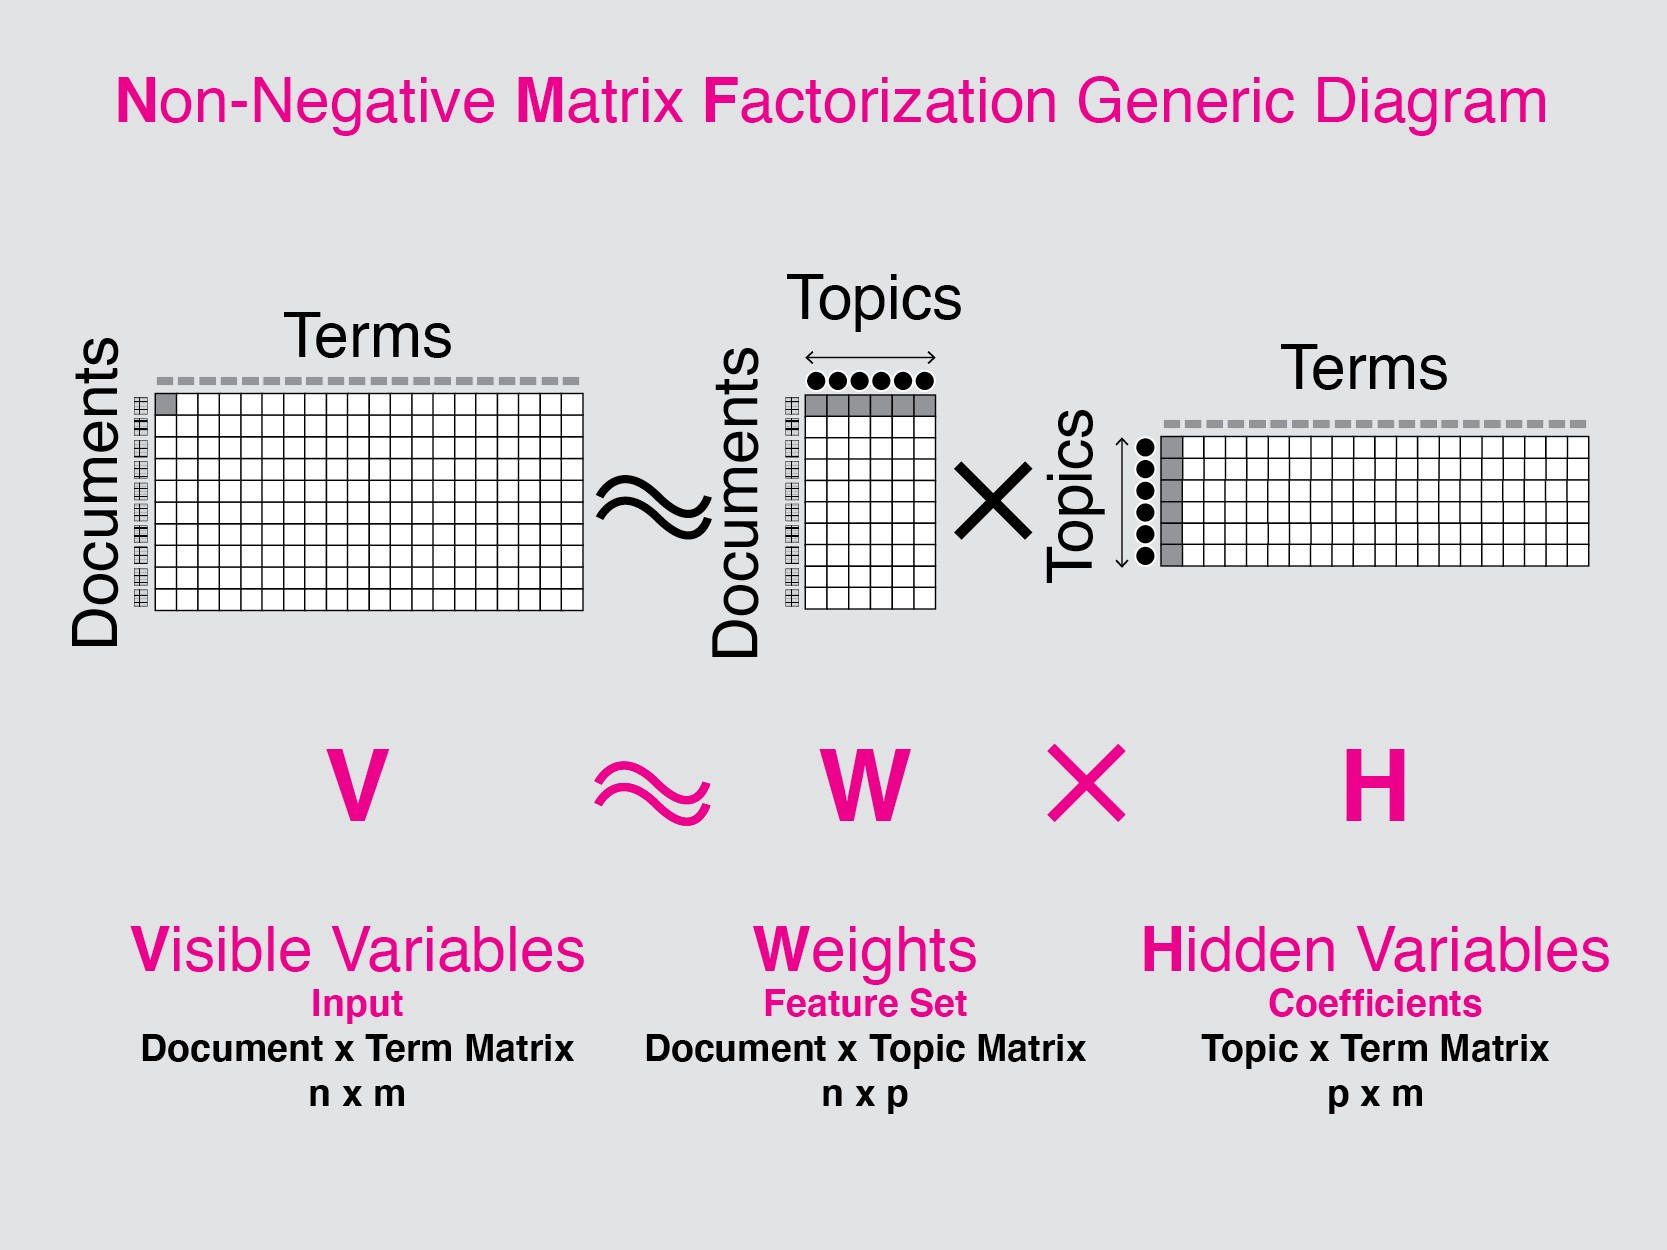

##### LDA
Description
LDA stands for Latent Dirichlet Allocation. This algorithm takes a term frequency matrix or tf-idf matrix as an input, and learns distributions of term/n-gram over n pre-determined amount of topics. Once this is completed, it again learns distributions of documents over those topics, and outputs a vector of length n of probabilities of membership in each topic for each document. For example, if we want to learn two topics and we have a document with the sentence “I enjoy watching racing sports such as F1, MotoGP, and Nascar however I stay active by playing hockey.”. Assume LDA will reasonably estimate two topics, one of which will have a high term frequency of “F1, Nascar, racing” and the other “hockey”. Given these topics, LDA will give our document a vector of [0.80, 0.20] as it contains mainly racing related terms, and only a small amount of hockey related terms.

Training Data
We used the 2018 filings of companies from the top 5 categories (Prepackaged Software, Pharmaceutical Preparations, Crude Petroleum and Natural Gas, Real Estate Investment Trusts, State Commercial Banks) to train our model. We applied normalising methods such as lemmatization, removing stop words, and removing special characters.


##### LSA
Description
LSA stands for Latent Semantic Analysis. This algorithm uses Singular Value Decomposition (SVD) to reduce a term-frequency/tf-idf matrix down from a high dimensional space into a lower dimensional space. In scikit-learn it is known as TruncatedSVD. LSA is similar to PCA in how it works, except it does not center the data beforehand which works better for sparse matrices (exactly what a term-frequency/tf-idf matrix is). It is mainly used to identify and reduce the document term matrix down to the most important terms/n-grams and therefore should provide the semantic information about which words are most important for our documents, and how closely they are to eachother within our lower dimensional space.

Training Data
We used the 2018 filings of companies from the top 5 categories (Prepackaged Software, Pharmaceutical Preparations, Crude Petroleum and Natural Gas, Real Estate Investment Trusts, State Commercial Banks) to train our model. We applied normalising methods such as lemmatization, removing stop words, and removing special characters.

## Citations
hi there